# 1. Install and import dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Get keypoints using MP Holistic


In [2]:
# Holistic model
mp_holistic = mp.solutions.holistic 

# Drawing utilities
mp_drawing = mp.solutions.drawing_utils

In [3]:
# Function to make a detection using mediapipe

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color conversion RGB 2 BGR
    return image, results

In [4]:
# Function to draw the landmarks

def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
# Setup webcam capture

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

: 

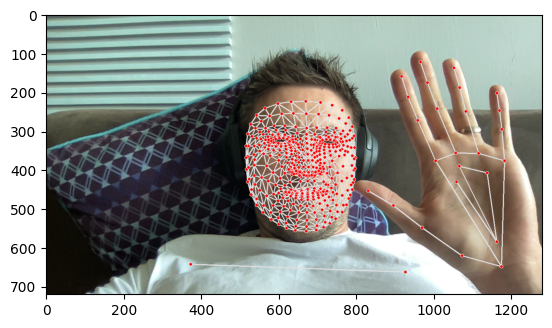

In [9]:
# Test pose detection + drawing of keypoints on an image (last frame from webcam feed)

draw_landmarks(frame, results)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values


In [8]:
# Test to extract landmarks

pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [9]:
pose

[array([ 0.50548464,  0.55686677, -1.03704393,  0.99996293]),
 array([ 0.53146327,  0.47774044, -0.95663518,  0.9999463 ]),
 array([ 0.54830754,  0.47790745, -0.95693362,  0.99993581]),
 array([ 0.56225455,  0.47902831, -0.95681894,  0.9999246 ]),
 array([ 0.47815943,  0.48206639, -0.94918168,  0.99995136]),
 array([ 0.46046153,  0.48537928, -0.94895351,  0.99995458]),
 array([ 0.44457316,  0.48930418, -0.94936639,  0.99996001]),
 array([ 0.58889788,  0.52523994, -0.48074466,  0.99994016]),
 array([ 0.42768478,  0.53207964, -0.43009672,  0.99996936]),
 array([ 0.54136074,  0.64672881, -0.86545098,  0.99994564]),
 array([ 0.47570056,  0.64577097, -0.85400915,  0.99995643]),
 array([ 0.73517609,  0.97789562, -0.24259952,  0.99473321]),
 array([ 0.31088209,  0.94340438, -0.25442559,  0.99915612]),
 array([ 0.84646332,  1.5068171 , -0.46603909,  0.06356661]),
 array([ 0.10081086,  1.37769842, -0.9860425 ,  0.88040376]),
 array([ 0.8643592 ,  1.76719654, -1.00055456,  0.09700852]),
 array([

In [6]:
def extract_keypoints(results):
    # Extract keypoints for pose
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

    # Extract keypoints for pose
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

    # Extract keypoints for left hand
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    # Extract keypoints for right hand
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh])


In [11]:
result_test = extract_keypoints(results)

In [14]:
# We get an array of shape (1662,)
# 468*3 keypoints for the face, 33*4 keypoints for the pose and 21*3 keypoints for each hand.

result_test.shape

(1662,)

# 4. Setup Folders for Collection

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../video_data') 

# Actions that we try to detect
actions = np.array(['headache', 'soar throat', 'cough', 'fever', 'stomach aches', 'tired', 'runny nose', 'nausea', 'shortness of breath'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [26]:
# Run this sell to create the folder structure as per the variables above

for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

For each of the 9 words we will collect 30 videos. Then for each of those videos we will use 30 frames.

It means in total our model will be trained on 9 * 30 * 30 👉 **81.000 frames**

For each frame, there will be a total of 👉 **1662 keypoint values**

# 5. Collect Keypoint Values for Training and Testing


In [9]:
cap = cv2.VideoCapture(0)

# Pick the word
action = actions[6]

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through sequences aka videos
    for sequence in range(no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
#                 print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # NEW Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(3000)
            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
            
            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


: 